In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import mdp

In [21]:
from mdp import example

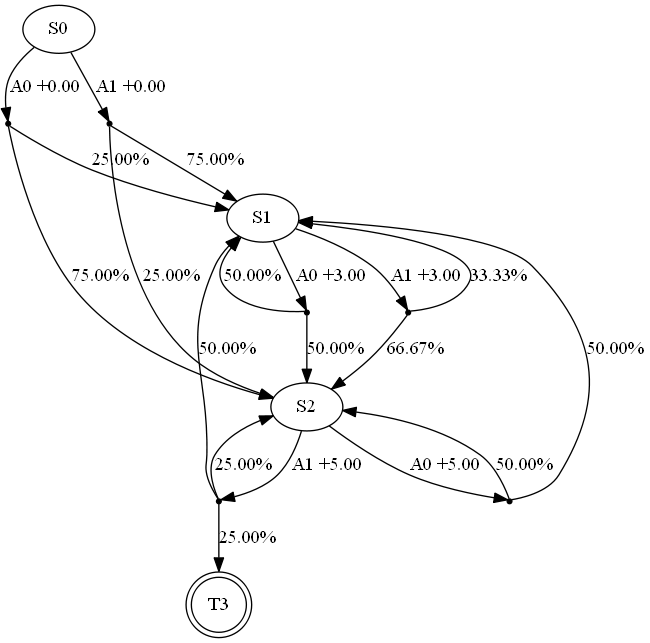

In [6]:
mdp.display_mdp(example.MULTI_ROUND_NDMP)

In [25]:
env = example.MULTI_ROUND_NDMP.to_env()

from matplotlib import pyplot

def display_env():    
    env.render()
    env.render_widget.width=500
    time.sleep(0.200)
    
    
for _ in range(3):
    env.reset()
    display_env()

    while True:
        state, reward, is_done, _ = env.step(env.action_space.sample())
        display_env()

        if is_done:
            break
    

In [10]:
from mdp import lp
solver = lp.LinearProgramming(example.MULTI_ROUND_NDMP)
solver.compute_v_vector(max_iterations=1000)

array([ 37.56206147,  40.43162669,  42.17075712,   0.        ])

In [30]:
mdp.Transitions(example.MULTI_ROUND_NDMP).next_states

{(State(S0, 0, False), Action(A0, 0)): {State(S1, 1, False): 0.25,
  State(S2, 2, False): 0.75},
 (State(S0, 0, False), Action(A1, 1)): {State(S1, 1, False): 0.75,
  State(S2, 2, False): 0.25},
 (State(S1, 1, False), Action(A0, 0)): {State(S1, 1, False): 0.5,
  State(S2, 2, False): 0.5},
 (State(S1, 1, False),
  Action(A1, 1)): {State(S1, 1, False): 0.3333333333333333, State(S2, 2, False): 0.6666666666666666},
 (State(S2, 2, False), Action(A0, 0)): {State(S1, 1, False): 0.5,
  State(S2, 2, False): 0.5},
 (State(S2, 2, False), Action(A1, 1)): {State(S1, 1, False): 0.5,
  State(S2, 2, False): 0.25,
  State(T3, 3, True): 0.25},
 (State(T3, 3, True), Action(A0, 0)): {},
 (State(T3, 3, True), Action(A1, 1)): {}}

In [29]:
solver.next_states

array([[[0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1]]], dtype=int8)